In [23]:
from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os

In [24]:
DATA_PATH = "./all/"

In [35]:
def get_labels(path=DATA_PATH):
    labels = os.listdir(path)
    label_indices = np.arange(0, len(labels))
    return labels, label_indices, to_categorical(label_indices)


def wav2mfcc(file_path, n_mfcc=20, max_len=11):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    wave = np.asfortranarray(wave[::3])
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=n_mfcc)

    # If maximum length exceeds mfcc lengths then pad the remaining ones
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

def save_data_to_array(path=DATA_PATH, max_len=30, n_mfcc=20):
    labels, _, _ = get_labels(path)
    mfcc_vectors = []
    for label in labels:
        print(label)     

        wavfiles = [path + label + '/' + wavfile for wavfile in os.listdir(path + '/' + label)]
        for wavfile in tqdm(wavfiles, "Saving vectors of label - '{}'".format(label)):
            mfcc = wav2mfcc(wavfile, max_len=max_len, n_mfcc=n_mfcc)
            mfcc_vectors.append(mfcc)
    np.save('mfccs.npy', mfcc_vectors)

In [36]:
lb_list = save_data_to_array(DATA_PATH)

Saving vectors of label - 'can ho':   3%|█▏                                          | 14/532 [00:00<00:03, 134.61it/s]

can ho


Saving vectors of label - 'canh sat':   1%|▍                                           | 6/556 [00:00<00:10, 53.09it/s]

canh sat


Saving vectors of label - 'com':   2%|▊                                               | 10/550 [00:00<00:05, 95.90it/s]

com


Saving vectors of label - 'hoc sinh':   2%|▋                                           | 8/531 [00:00<00:06, 77.66it/s]

hoc sinh


Saving vectors of label - 'nguoi':   3%|█▏                                           | 14/529 [00:00<00:03, 136.29it/s]

nguoi


Saving vectors of label - 'nguoi': 100%|████████████████████████████████████████████| 529/529 [00:02<00:00, 197.66it/s]


In [21]:
import numpy as np

mfccs = np.load('mfccs.npy')
mfccs.shape

(2698, 20, 11)

In [2]:
max_len = 11
buckets = 20

# Save data to array file first
save_data_to_array(max_len=max_len, n_mfcc=buckets)

labels=["bed", "happy", "cat"]

Saving vectors of label - 'happy': 100%|███████████████████████████████████████████| 1742/1742 [00:22<00:00, 76.59it/s]


In [3]:
X = np.load(labels[0] + '.npy')
y = np.zeros(X.shape[0])
X[1].shape

(20, 11)

In [4]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [5]:
# # Feature dimension
channels = 1
epochs = 50
batch_size = 100

num_classes = 3

X_train = X_train.reshape(X_train.shape[0], buckets, max_len, channels)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len, channels)

0.0


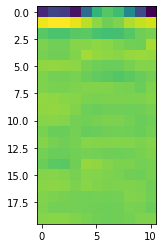

In [6]:
plt.imshow(X_train[100, :, :, 0])
print(y_train[100])

In [7]:
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [8]:

X_train = X_train.reshape(X_train.shape[0], buckets, max_len)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len)

model = Sequential()
model.add(Flatten(input_shape=(buckets, max_len)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train_hot, epochs=epochs, validation_data=(X_test, y_test_hot))

Epoch 1/50
98/98 [==============================] - 1s 6ms/step - loss: 28.1429 - accuracy: 0.4240 - val_loss: 8.1761 - val_accuracy: 0.6127
Epoch 2/50
98/98 [==============================] - 0s 2ms/step - loss: 7.0498 - accuracy: 0.6226 - val_loss: 5.3471 - val_accuracy: 0.6816
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 4.9180 - accuracy: 0.6835 - val_loss: 4.3713 - val_accuracy: 0.7139
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 3.8220 - accuracy: 0.7237 - val_loss: 3.8164 - val_accuracy: 0.7259
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 3.3358 - accuracy: 0.7416 - val_loss: 3.4691 - val_accuracy: 0.7433
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 3.0388 - accuracy: 0.7549 - val_loss: 3.7075 - val_accuracy: 0.7206
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 2.8306 - accuracy: 0.7457 - val_loss: 3.1684 - val_accuracy: 0.7486
Epoch 8/50
98/98 [=

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 220)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 663       
Total params: 663
Trainable params: 663
Non-trainable params: 0
_________________________________________________________________


In [39]:
import os 

paths = os.listdir('data/happy/')
len_list = []

for path in paths:
    wave, sr = librosa.load('data/happy/' + path, mono=True, sr=None)
    wave = np.asfortranarray(wave[::3])
    mfcc = librosa.feature.mfcc(wave, sr=16000, n_mfcc=20)
    len_list.append(mfcc.shape[1])
    
sum(len_list)/len(len_list)

10.829506314580941